#### 2019 코로나 데이터 분석
##### 1. 데이터 분석
##### 2. 데이터 로드
##### 3. 데이터 전처리
##### 4. 데이터 정제
#####   4-1. 목표 그래프 주제 :
#####   4-2. 목표 그래프 주제 :
##### 5. 그래프 생성

In [158]:
# 1. 데이터 분석
## - ObservationDate 관측일
## - Country/Region  나라
## - Confirmed       인원
## - Deaths          사망 인원
## - Recovered       치료 인원

In [159]:
## 1-1 import
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [160]:
# 2. 데이터 로드
# DATA_PATH = os.getcwd()
DATA_PATH = './data/'
df = pd.read_csv(DATA_PATH + 'covid_19_data.csv')
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [161]:
# 3. 데이터 전처리
import missingno as msno

## 3-1. null 값 처리
## 3-2. column 데이터 일괄 변환

### 데이터 정보 보기
df.info(
    verbose = True, ## 자세히 보기 default = True
    memory_usage = True, ## 메모리 사용량 default = True
    null_counts = True ## default = True
)

## 3-1. null 값 처리
df['Province/State'] = df['Province/State'].fillna('') ## null 값을 ''로 변환
## null 값은 나라의 수도를 초기값으로 하는 방법 ?

## 3-2. column 데이터 일괄 변환
df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')
df['Country/Region'] = df['Country/Region'].replace('US', 'United States')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


/var/folders/yf/mmrj8c9d2zbfn3w8crhhf0_r0000gn/T/ipykernel_9558/1973509035.py:8: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [235]:
# 4. 데이터 정제
## 4-1. 목표 그래프 주제: 나라별 발생 년도에 따른 총 코로나 발생 수와 코로나 사망자 비율

### df 복사
data = df.copy()

### 관측 년도 컬럼 생성
data['ObservationYear'] = data['ObservationDate'].map(lambda x: x.split('/')[2])

### 관련 데이터 정제
data_set = data[['ObservationYear', 'Confirmed', 'Country/Region', 'Deaths']]
data = data_set.groupby(
        ['Country/Region', 'ObservationYear'],
        as_index = False
    )['Confirmed', 'Deaths'].agg('sum')

data = data[
    (data['Country/Region'] == 'South Korea') |
    (data['Country/Region'] == 'United States') |
    (data['Country/Region'] == 'China') |
    (data['Country/Region'] == 'Canada') |
    # (data['Country/Region'] == 'Australia')
    # (data['Country/Region'] == 'Macau')
    (data['Country/Region'] == 'France')
]
# k_data = data[(data['Country/Region'] == 'South Korea')]
# us_data = data[(data['Country/Region'] == 'United States')]
# c_data = data[(data['Country/Region'] == 'China')]
# cd_data = data[(data['Country/Region'] == 'Canada')]
# au_data = data[(data['Country/Region'] == 'Australia')]

## South Korea, United States, China, Canada, Australia만 그래프 그림

/var/folders/yf/mmrj8c9d2zbfn3w8crhhf0_r0000gn/T/ipykernel_9558/1939519760.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = data_set.groupby(


In [236]:
# # 5. 그래프 생성
# fig, ax = plt.subplots()
#
# # x축
# x_labels = np.arange(len(list(data[data['Country/Region'].unique()])))
# x_2020 = ax.bar(0.2, list(data[(data.ObservationYear == '2020')]), 0.1, label='2020')
# # x_2021 = ax.bar(0.2, list(data[(data.ObservationYear == '2021')]), 0.1, label='2021')
#
# plt.show()
#
# label_2020 = data[(data.ObservationYear == '2020')]['Country/Region']
# print(len(label_2020))
# corona_2020 = list(data[(data.ObservationYear == '2020')]['Confirmed'])
# print(len(corona_2020))
#
# lebel_2021 = data[(data.ObservationYear == '2021')]['Country/Region'].unique()
# print(len(lebel_2021))
# corona_2021 = list(data[(data.ObservationYear == '2021')]['Confirmed'])
# print(len(corona_2021))
#
# width = 0.35
#
# ax.bar(label_2020, corona_2020, width, label='2020')
# ax.bar(lebel_2021, corona_2021, width, bottom=corona_2020, label='2021')
#
# ax.set_ylabel('Scores')
# ax.set_title('Scores by Corona')
# ax.legend()
# #
# plt.show()

<BarContainer object of 5 artists>


TypeError: unsupported operand type(s) for +: 'Rectangle' and 'float'

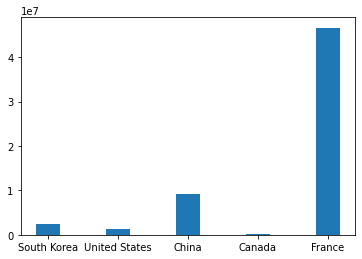

In [242]:
fig, ax = plt.subplots()

width = 0.35
x_labels = [ 'South Korea', 'United States', 'China', 'Canada', 'France' ]
x_2020_data = list(data[(data.ObservationYear == '2020')]['Deaths'])
x_2021_data = list(data[(data.ObservationYear == '2021')]['Deaths'])

x_2020 = ax.bar(x_labels, x_2020_data, width, label='2020')
x_2021 = ax.bar(x_labels, x_2021_data, width, bottom=x_2020, label='2021')
ax.set_ylabel('Scores')
ax.set_title('Scores by Corona')
ax.legend()

#
plt.show()